# Subgrid tendency analysis with filtering

In [1]:
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import xarray as xr

from modules import spatial

## 2048x256 vs. 256x32

In [2]:
fine_t = xr.open_mfdataset('../data/training/2048x256_t/*.nc')
fine_tplusdt = xr.open_mfdataset('../data/training/2048x256_tplusdt/*.nc')
coarse_t = xr.open_mfdataset(
    '../data/training/256x32_from_2048x256_filtered_t/*.nc')
coarse_tplusdt = xr.open_mfdataset(
    '../data/training/256x32_from_2048x256_filtered_tplusdt/*.nc')

fine_t = fine_t.isel(t=(fine_t.t < 299))
fine_tplusdt = fine_tplusdt.isel(t=(fine_tplusdt.t < 299))
coarse_t = coarse_t.isel(t=(coarse_t.t < 299))
coarse_tplusdt = coarse_tplusdt.isel(t=(coarse_tplusdt.t < 299))

In [3]:
def tendency(state_t, state_tplusdt):
    tend = (state_tplusdt.drop('t') - state_t.drop('t'))/state_t.timestep
    return tend.assign_coords({'t': state_t.t})

filter = spatial.Filter((2048, 256), (256, 32), 8)

fine_tend = tendency(fine_t, fine_tplusdt)
coarse_tend = tendency(coarse_t, coarse_tplusdt)
subgrid_tend = (
    filter(fine_tend.compute(), 1/32, kind='u') - coarse_tend.compute()
)

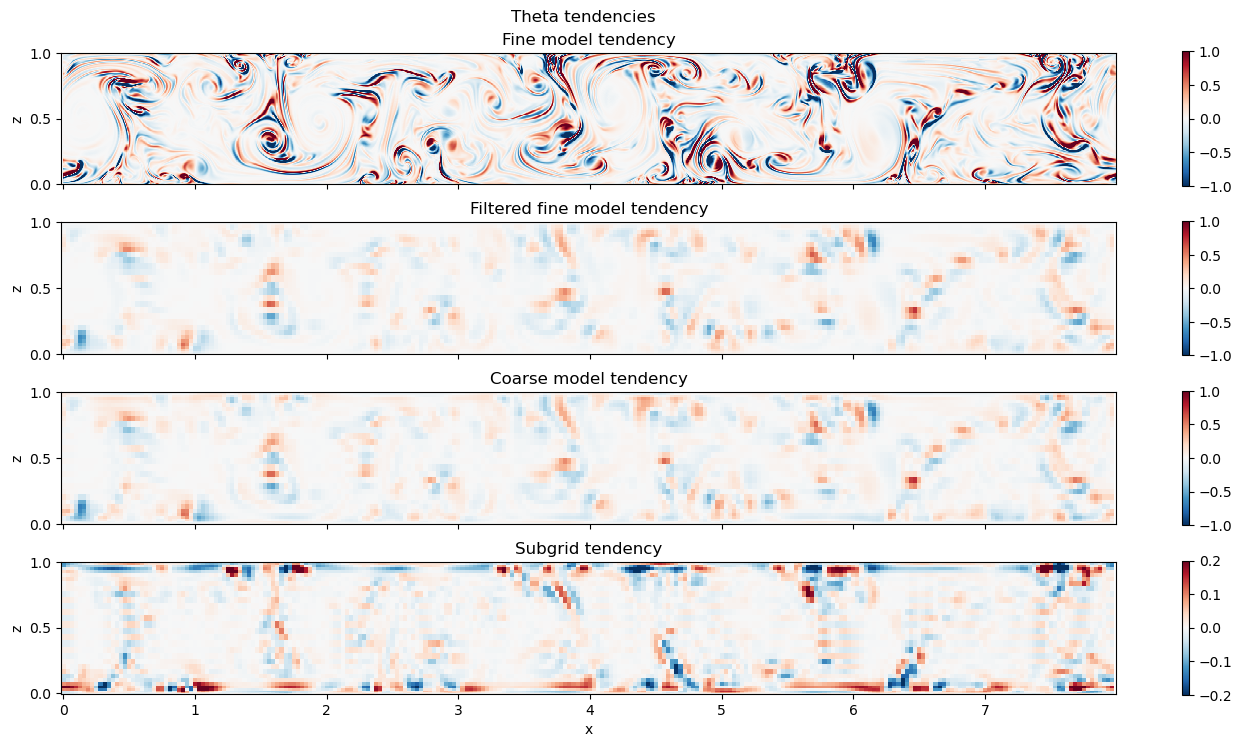

In [33]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14, 7.5))

mesh = axes[0].pcolormesh(
    fine_tend.x, fine_tend.z, fine_tend.theta.isel(t=-1).T,
    vmin=-1, vmax=1, cmap='RdBu_r'
)
axes[0].set(aspect='equal', ylabel='z', title='Fine model tendency')
fig.colorbar(mesh, ax=axes[0])

mesh = axes[1].pcolormesh(
    coarse_tend.x, coarse_tend.z,
    filter(fine_tend.theta.isel(t=-1).compute(), 1/32, kind='u').T,
    vmin=-1, vmax=1, cmap='RdBu_r'
)
axes[1].set(aspect='equal', ylabel='z', title='Filtered fine model tendency')
fig.colorbar(mesh, ax=axes[1])

mesh = axes[2].pcolormesh(
    coarse_tend.x, coarse_tend.z, coarse_tend.theta.isel(t=-1).T,
    vmin=-1, vmax=1, cmap='RdBu_r'
)
axes[2].set(aspect='equal', ylabel='z', title='Coarse model tendency')
fig.colorbar(mesh, ax=axes[2])

mesh = axes[3].pcolormesh(
    subgrid_tend.x, subgrid_tend.z, subgrid_tend.theta.isel(t=-1).T,
    vmin=-0.2, vmax=0.2, cmap='RdBu_r'
)
axes[3].set(aspect='equal', ylabel='z', xlabel='x', title='Subgrid tendency')
fig.colorbar(mesh, ax=axes[3])

fig.suptitle('Theta tendencies', x=0.42)
fig.tight_layout()

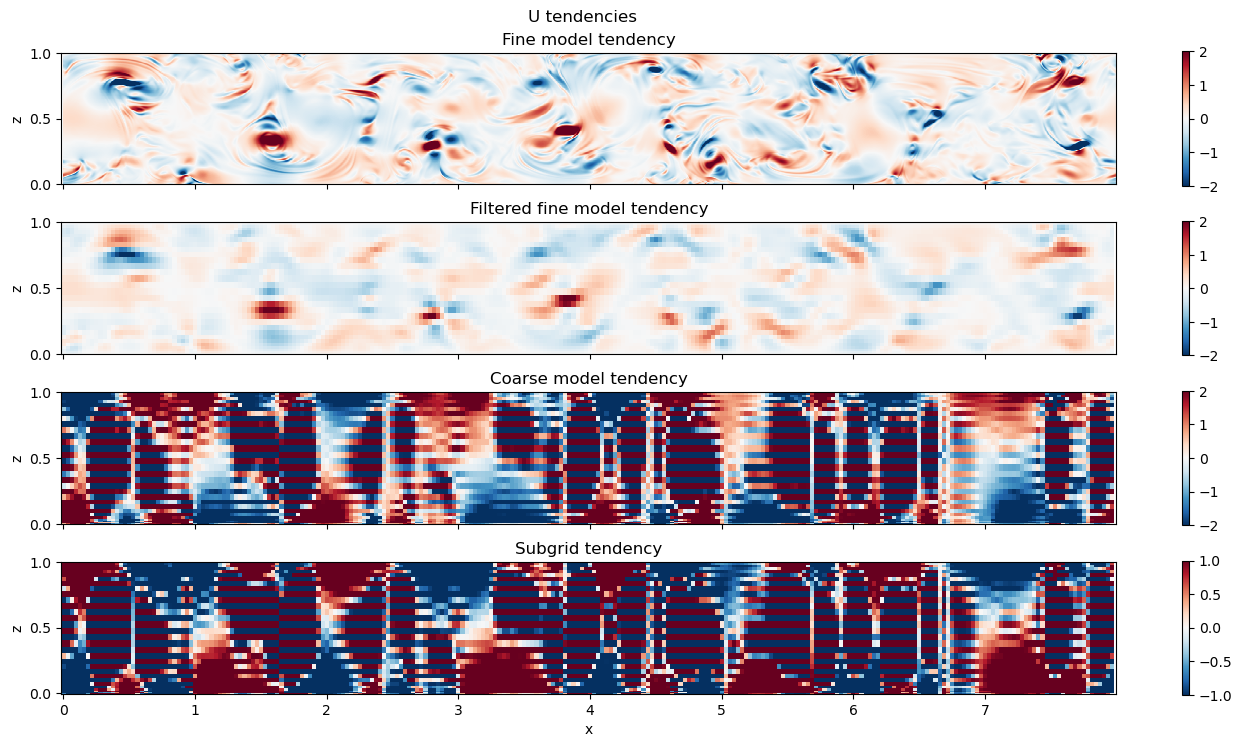

In [37]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14, 7.5))

mesh = axes[0].pcolormesh(
    fine_tend.x, fine_tend.z, fine_tend.u.isel(t=-1).T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[0].set(aspect='equal', ylabel='z', title='Fine model tendency')
fig.colorbar(mesh, ax=axes[0])

mesh = axes[1].pcolormesh(
    coarse_tend.x, coarse_tend.z,
    filter(fine_tend.u.isel(t=-1).compute(), 1/32, kind='u').T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[1].set(aspect='equal', ylabel='z', title='Filtered fine model tendency')
fig.colorbar(mesh, ax=axes[1])

mesh = axes[2].pcolormesh(
    coarse_tend.x, coarse_tend.z, coarse_tend.u.isel(t=-1).T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[2].set(aspect='equal', ylabel='z', title='Coarse model tendency')
fig.colorbar(mesh, ax=axes[2])

mesh = axes[3].pcolormesh(
    subgrid_tend.x, subgrid_tend.z, subgrid_tend.u.isel(t=-1).T,
    vmin=-1, vmax=1, cmap='RdBu_r'
)
axes[3].set(aspect='equal', ylabel='z', xlabel='x', title='Subgrid tendency')
fig.colorbar(mesh, ax=axes[3])

fig.suptitle('U tendencies', x=0.42)
fig.tight_layout()

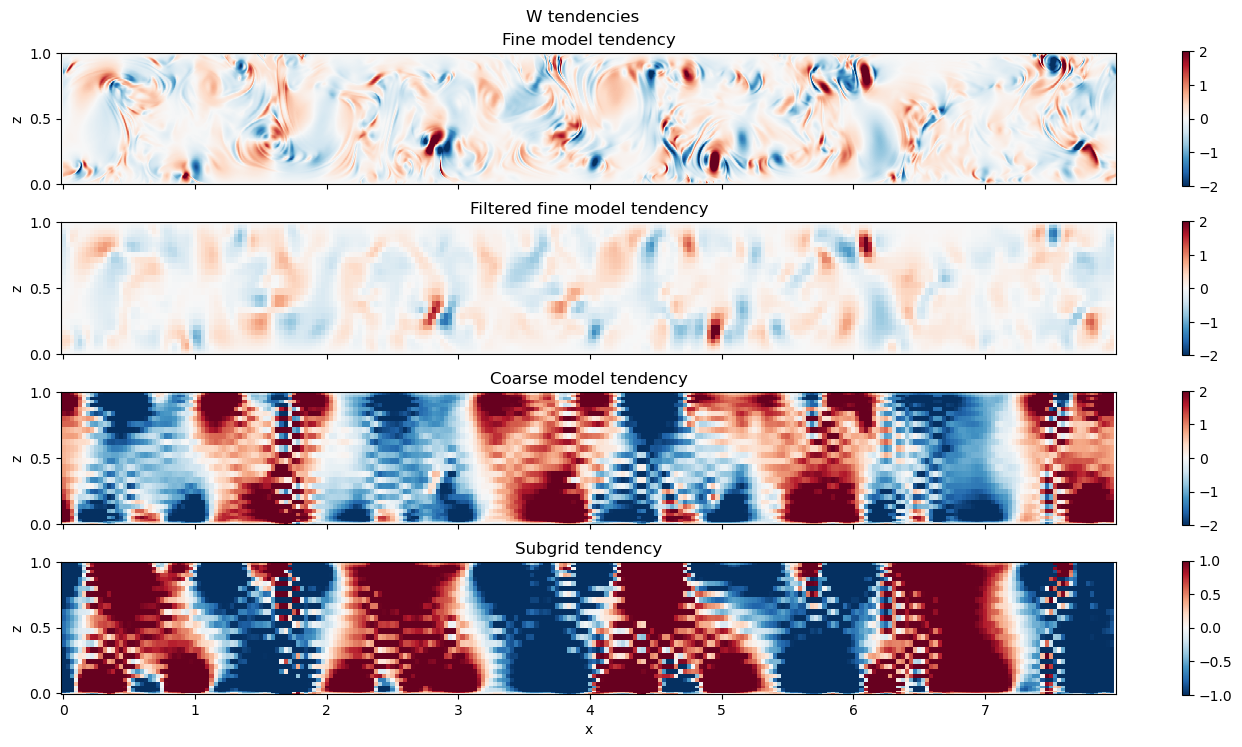

In [38]:
fig, axes = plt.subplots(4, 1, sharex=True, figsize=(14, 7.5))

mesh = axes[0].pcolormesh(
    fine_tend.x, fine_tend.z, fine_tend.w.isel(t=-1).T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[0].set(aspect='equal', ylabel='z', title='Fine model tendency')
fig.colorbar(mesh, ax=axes[0])

mesh = axes[1].pcolormesh(
    coarse_tend.x, coarse_tend.z,
    filter(fine_tend.w.isel(t=-1).compute(), 1/32, kind='u').T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[1].set(aspect='equal', ylabel='z', title='Filtered fine model tendency')
fig.colorbar(mesh, ax=axes[1])

mesh = axes[2].pcolormesh(
    coarse_tend.x, coarse_tend.z, coarse_tend.w.isel(t=-1).T,
    vmin=-2, vmax=2, cmap='RdBu_r'
)
axes[2].set(aspect='equal', ylabel='z', title='Coarse model tendency')
fig.colorbar(mesh, ax=axes[2])

mesh = axes[3].pcolormesh(
    subgrid_tend.x, subgrid_tend.z, subgrid_tend.w.isel(t=-1).T,
    vmin=-1, vmax=1, cmap='RdBu_r'
)
axes[3].set(aspect='equal', ylabel='z', xlabel='x', title='Subgrid tendency')
fig.colorbar(mesh, ax=axes[3])

fig.suptitle('W tendencies', x=0.42)
fig.tight_layout()

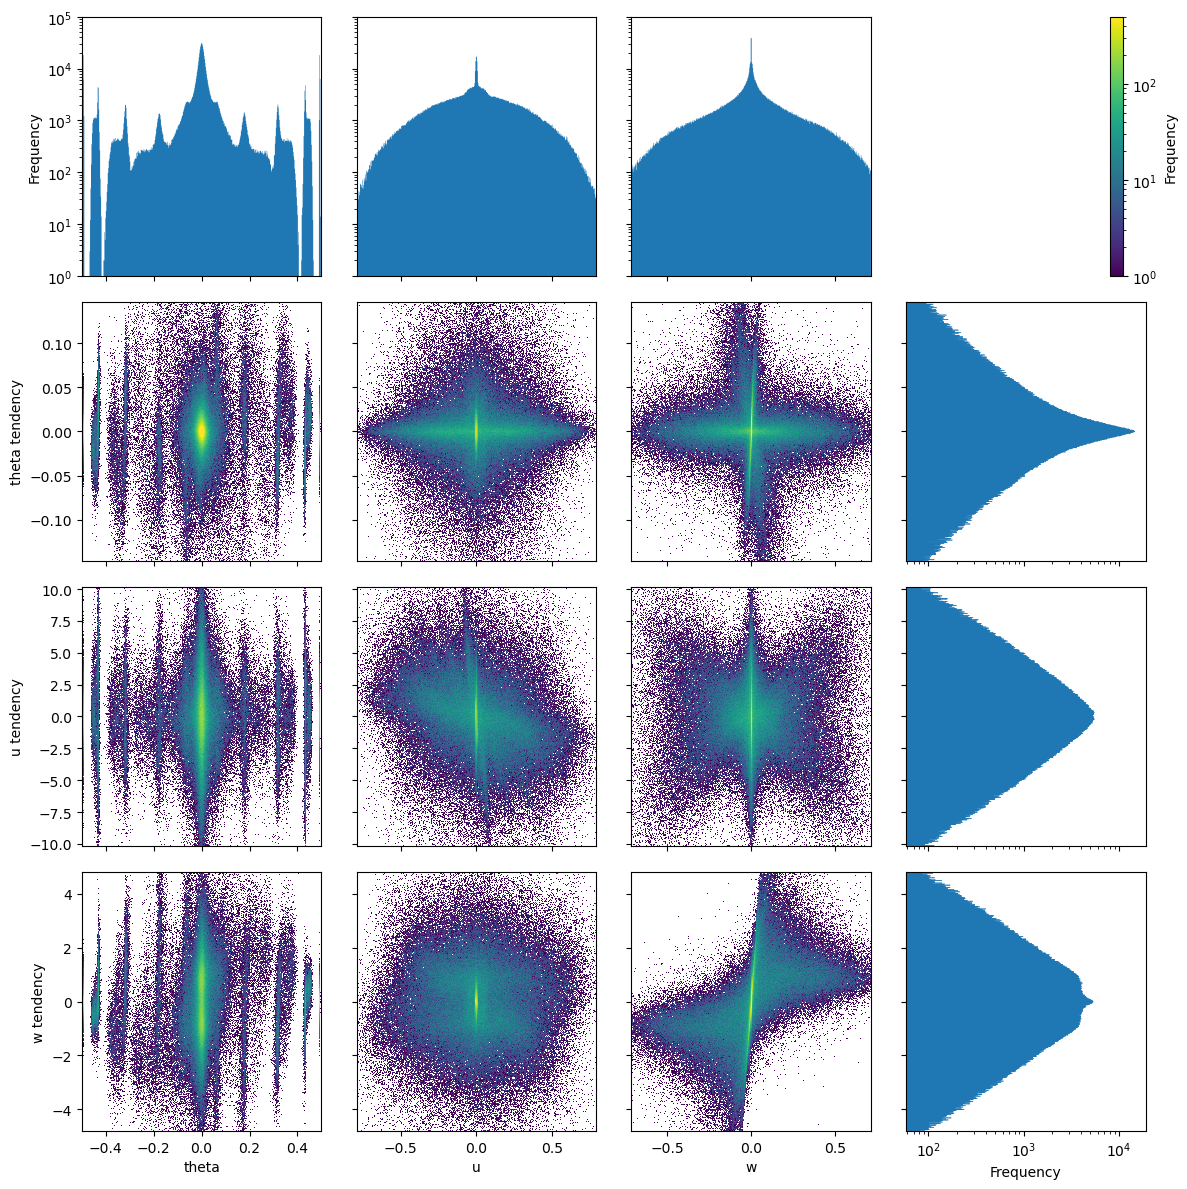

In [42]:
fig, axes = plt.subplots(4, 4, sharex='col', sharey='row', figsize=(12, 12))
hist1d_nbins = 500
hist2d_nbins = 500
n_std = 3

for i, tend_var in enumerate(subgrid_tend.data_vars):
    tend_data = subgrid_tend[tend_var].data.ravel()
    tend_lim = n_std*tend_data.std()
    axes[i+1,0].set_ylabel(f'{tend_var} tendency')

    for j, state_var in enumerate(coarse_t.data_vars):
        state_data = coarse_t[state_var].data.ravel().compute()
        if state_var == 'theta':
            state_lim = 0.5
        else:
            state_lim = n_std*state_data.std()

        _, _, _, hist = axes[i+1,j].hist2d(
            state_data, tend_data, bins=[hist2d_nbins, hist2d_nbins],
            range=[[-state_lim, state_lim], [-tend_lim, tend_lim]],
            norm='log', vmin=1, vmax=5e2
        )

        axes[i+1,3].hist(
            tend_data, bins=hist1d_nbins, orientation='horizontal',
            range=(-tend_lim, tend_lim), color='tab:blue',
            histtype='stepfilled', log=True
        )

        if i == 0:
            axes[0,j].hist(
                state_data, bins=hist1d_nbins,
                range=(-state_lim, state_lim), color='tab:blue',
                histtype='stepfilled', log=True
            )
            axes[0,j].set_ylim(1, 1e5)
            axes[-1,j].set_xlabel(state_var)

fig.colorbar(hist, ax=axes[0,-1], label='Frequency')
axes[0,0].set_ylabel('Frequency')
axes[-1,-1].set_xlabel('Frequency')
axes[0,3].remove()
fig.tight_layout()

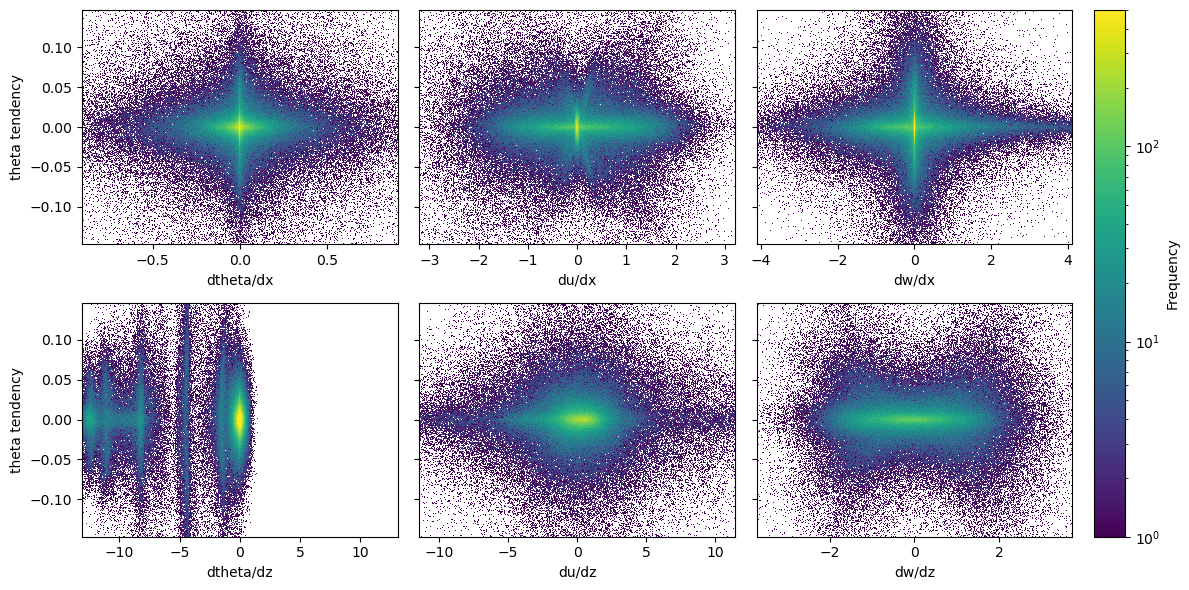

In [43]:
fig = plt.figure(figsize=(12, 6))
gs = mpl.gridspec.GridSpec(
    2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 0.1])
hist2d_nbins = 500
n_std = 3

tend_var = 'theta'
tend_data = subgrid_tend[tend_var].data.ravel()
tend_lim = n_std*tend_data.std()

for i, coord in enumerate(['x', 'z']):
    for j, state_var in enumerate(coarse_t.data_vars):
        state_data = coarse_t[state_var].differentiate(coord).data.ravel().compute()
        state_lim = n_std*state_data.std()

        ax = fig.add_subplot(gs[i,j])
        _, _, _, hist = ax.hist2d(
            state_data, tend_data, bins=[hist2d_nbins, hist2d_nbins],
            range=[[-state_lim, state_lim], [-tend_lim, tend_lim]],
            norm='log', vmin=1, vmax=5e2
        )

        ax.set_xlabel(f'd{state_var}/d{coord}')
        if j == 0:
            ax.set_ylabel(f'{tend_var} tendency')
        else:
            ax.set_yticklabels([])

ax = fig.add_subplot(gs[:,-1])
fig.colorbar(hist, cax=ax, label='Frequency')
fig.tight_layout()

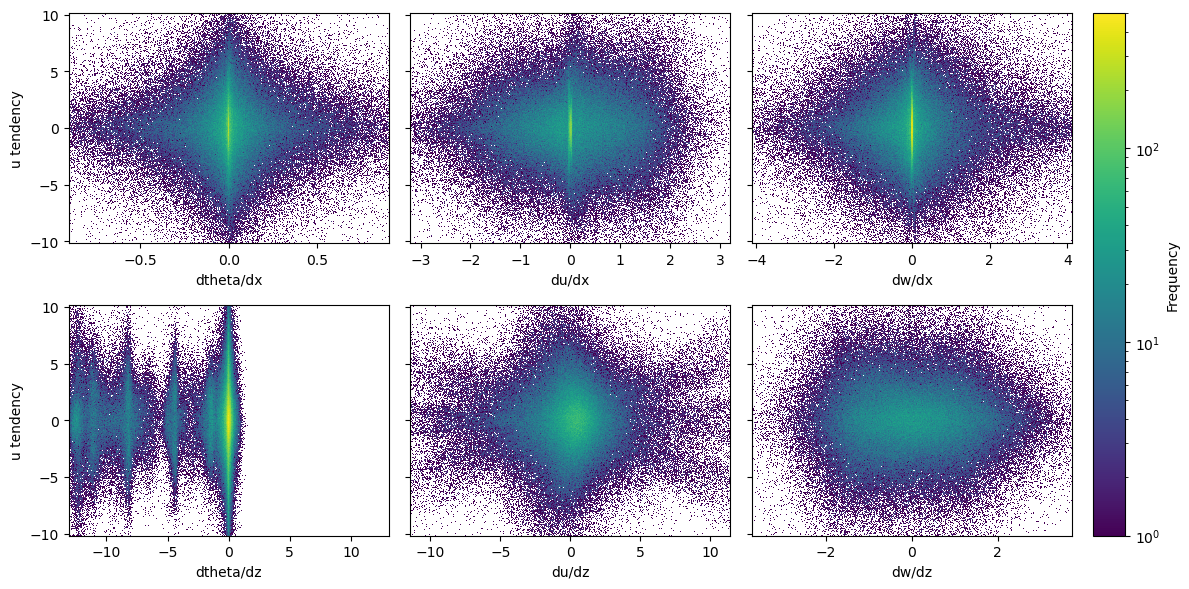

In [44]:
fig = plt.figure(figsize=(12, 6))
gs = mpl.gridspec.GridSpec(
    2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 0.1])
hist2d_nbins = 500
n_std = 3

tend_var = 'u'
tend_data = subgrid_tend[tend_var].data.ravel()
tend_lim = n_std*tend_data.std()

for i, coord in enumerate(['x', 'z']):
    for j, state_var in enumerate(coarse_t.data_vars):
        state_data = coarse_t[state_var].differentiate(coord).data.ravel().compute()
        state_lim = n_std*state_data.std()

        ax = fig.add_subplot(gs[i,j])
        _, _, _, hist = ax.hist2d(
            state_data, tend_data, bins=[hist2d_nbins, hist2d_nbins],
            range=[[-state_lim, state_lim], [-tend_lim, tend_lim]],
            norm='log', vmin=1, vmax=5e2
        )

        ax.set_xlabel(f'd{state_var}/d{coord}')
        if j == 0:
            ax.set_ylabel(f'{tend_var} tendency')
        else:
            ax.set_yticklabels([])

ax = fig.add_subplot(gs[:,-1])
fig.colorbar(hist, cax=ax, label='Frequency')
fig.tight_layout()

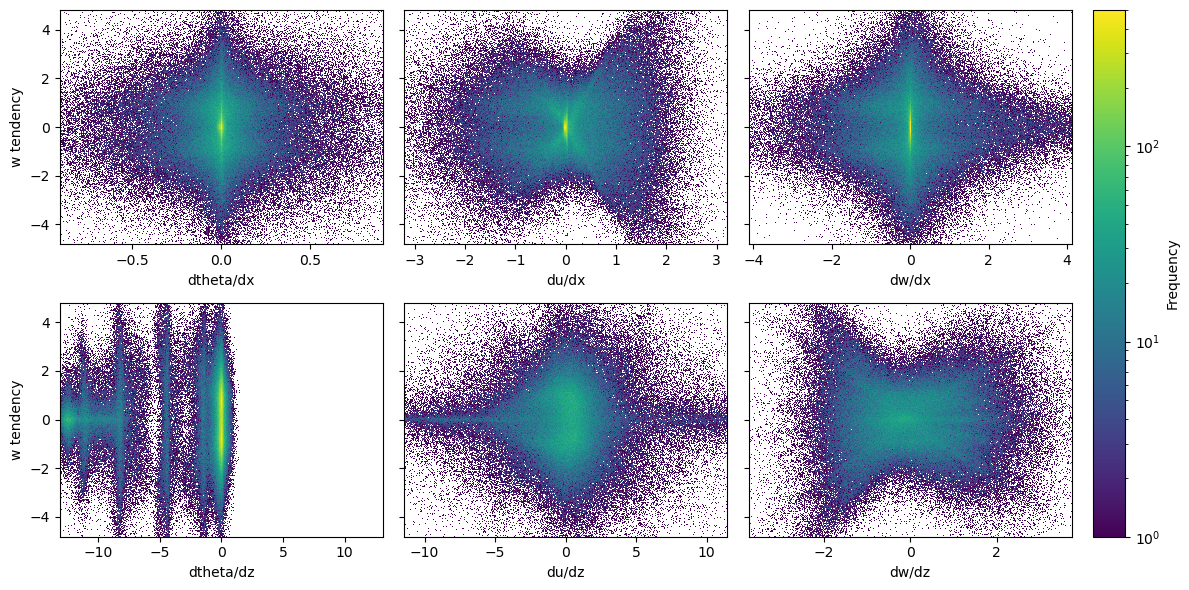

In [45]:
fig = plt.figure(figsize=(12, 6))
gs = mpl.gridspec.GridSpec(
    2, 4, height_ratios=[1, 1], width_ratios=[1, 1, 1, 0.1])
hist2d_nbins = 500
n_std = 3

tend_var = 'w'
tend_data = subgrid_tend[tend_var].data.ravel()
tend_lim = n_std*tend_data.std()

for i, coord in enumerate(['x', 'z']):
    for j, state_var in enumerate(coarse_t.data_vars):
        state_data = coarse_t[state_var].differentiate(coord).data.ravel().compute()
        state_lim = n_std*state_data.std()

        ax = fig.add_subplot(gs[i,j])
        _, _, _, hist = ax.hist2d(
            state_data, tend_data, bins=[hist2d_nbins, hist2d_nbins],
            range=[[-state_lim, state_lim], [-tend_lim, tend_lim]],
            norm='log', vmin=1, vmax=5e2
        )

        ax.set_xlabel(f'd{state_var}/d{coord}')
        if j == 0:
            ax.set_ylabel(f'{tend_var} tendency')
        else:
            ax.set_yticklabels([])

ax = fig.add_subplot(gs[:,-1])
fig.colorbar(hist, cax=ax, label='Frequency')
fig.tight_layout()